## Introduction - Suicide Data Analysis

The dataset contains the following features:

1. **Country**: The country where the suicide statistics were recorded.

2. **Age**: Age groups of the population, categorizing individuals into different ranges.

3. **Sex**: Gender of individuals, indicating whether the suicide statistics are for males or females.

4. **Suicides Number**: The absolute count of suicides recorded.

5. **Population**: The total population of the specified demographic group.

6. **Suicides/100k Pop**: The suicide rate per 100,000 population, providing a normalized measure.

7. **GDP for Year ($)**: The Gross Domestic Product (GDP) for the given year in dollars.

8. **GDP per Capita ($)**: The GDP per capita, calculated as GDP divided by the population.

9. **Generation**: A generational cohort classification, grouping individuals based on birth years.


# Install required libraries

In [1]:
!pip install dask

In [2]:
!pip install dask-ml

In [3]:
!pip install --upgrade dask-ml

In [4]:
!pip install scikit-learn

# Import Libraries

In [5]:
import dask.dataframe as dd
import pandas as pd
from dask_ml.model_selection import train_test_split
from dask_ml.linear_model import LinearRegression
from dask_ml.preprocessing import StandardScaler
from dask_ml.metrics import mean_squared_error, mean_absolute_error, r2_score
import dask.array as da
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
file_path = 'C:/Users/madih/big_data_analytics_project/suicide_statistics/suicide_statistics.csv'
df = dd.read_csv(file_path)

# Exploratory Data Analysis

In [7]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Data summary

In [8]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 12 entries, country to generation
dtypes: object(6), float64(2), int64(4)

### Statistical Summary

In [9]:
df.describe().compute()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### Check for null values

In [10]:
df.isna().sum().compute()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
gdp_for_year ($)          0
gdp_per_capita ($)        0
generation                0
dtype: int64

<AxesSubplot:>

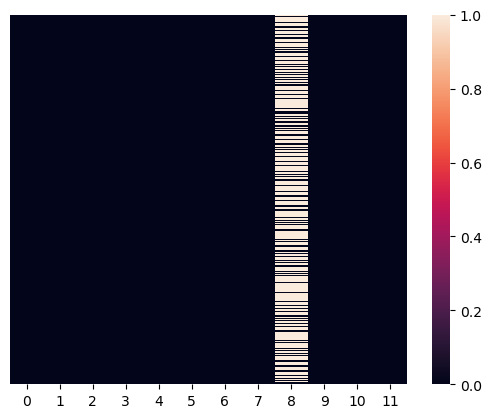

In [11]:
sns.heatmap(df.isnull(),yticklabels=False)

### Drop 'HDI for year' feature

In [12]:
df = df.drop("HDI for year", axis=1)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


# Data Transformation

In [13]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
gdp_for_year ($)       object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [14]:
df["gdp_for_year ($)"] = df["gdp_for_year ($)"].str.replace(",", "").astype("int64")

In [15]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
gdp_for_year ($)        int64
gdp_per_capita ($)      int64
generation             object
dtype: object

In [16]:
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,2156624900,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,2156624900,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,2156624900,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,2156624900,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,2156624900,796,Generation X


<AxesSubplot:>

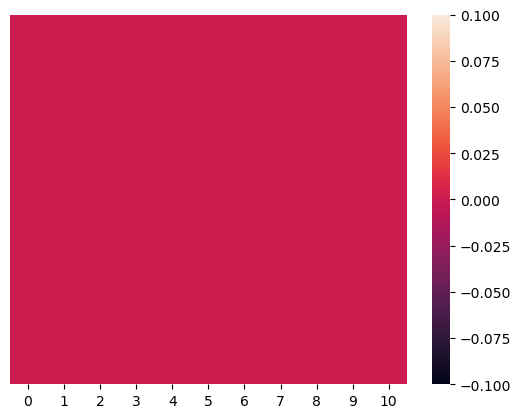

In [17]:
sns.heatmap(df.isnull(),yticklabels=False)

### Calculate the total number of suicides in all countries

In [18]:
total_suicides_all_countries = df['suicides_no'].sum().compute()
print(f"Total Number of Suicides in All Countries: {total_suicides_all_countries}")

Total Number of Suicides in All Countries: 6748420


### Total suicides by country

In [19]:
suicides_by_country = df.groupby('country')['suicides_no'].sum().compute()
suicides_by_country

country
Albania                    1970
Antigua and Barbuda          11
Argentina                 82219
Armenia                    1905
Aruba                       101
                         ...   
United Arab Emirates        622
United Kingdom           136805
United States           1034013
Uruguay                   13138
Uzbekistan                34803
Name: suicides_no, Length: 101, dtype: int64

### Total suicides by age group

In [20]:
suicides_by_age = df.groupby('age')['suicides_no'].sum().compute()
print(suicides_by_age)

age
15-24 years     808542
25-34 years    1123912
35-54 years    2452141
5-14 years       52264
55-74 years    1658443
75+ years       653118
Name: suicides_no, dtype: int64


### Total suicides by gender

In [21]:
suicides_by_gender = df.groupby('sex')['suicides_no'].sum().compute()
print(suicides_by_gender)

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64


In [22]:
# Calculate the total suicides by country
total_suicides_by_country = df.groupby('country')['suicides_no'].sum().compute()

# Find the country with the maximum suicides
max_suicides_country = total_suicides_by_country.idxmax()
max_suicides_value = total_suicides_by_country[max_suicides_country]

# Find the country with the minimum suicides
min_suicides_country = total_suicides_by_country.idxmin()
min_suicides_value = total_suicides_by_country[min_suicides_country]

# Print the results
print(f"Country with Maximum Suicides: {max_suicides_country} ({max_suicides_value} suicides)")
print(f"Country with Minimum Suicides: {min_suicides_country} ({min_suicides_value} suicides)")

Country with Maximum Suicides: Russian Federation (1209742 suicides)
Country with Minimum Suicides: Dominica (0 suicides)


# Data Visualization

<AxesSubplot:>

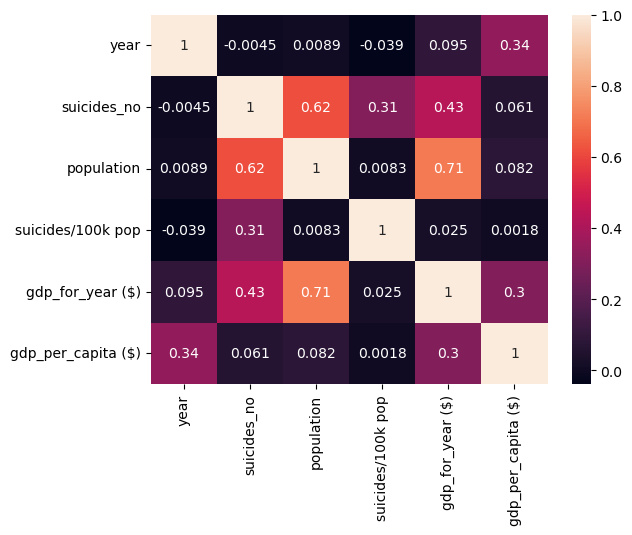

In [23]:
sns.heatmap(df.corr().compute(), annot=True)

Text(0, 0.5, 'Number of Suicides')

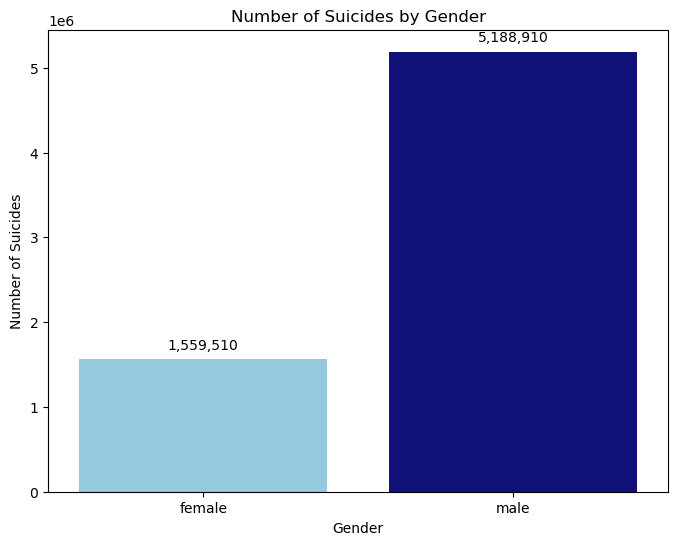

In [24]:
# Specify colors for the bars
colors = ['skyblue', 'darkblue']
# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=suicides_by_gender.index, y=suicides_by_gender.values, palette=colors)

# Add numbers on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Customize the plot
plt.title('Number of Suicides by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Suicides')

Text(0.5, 1.0, 'Distribution of Suicides by Age')

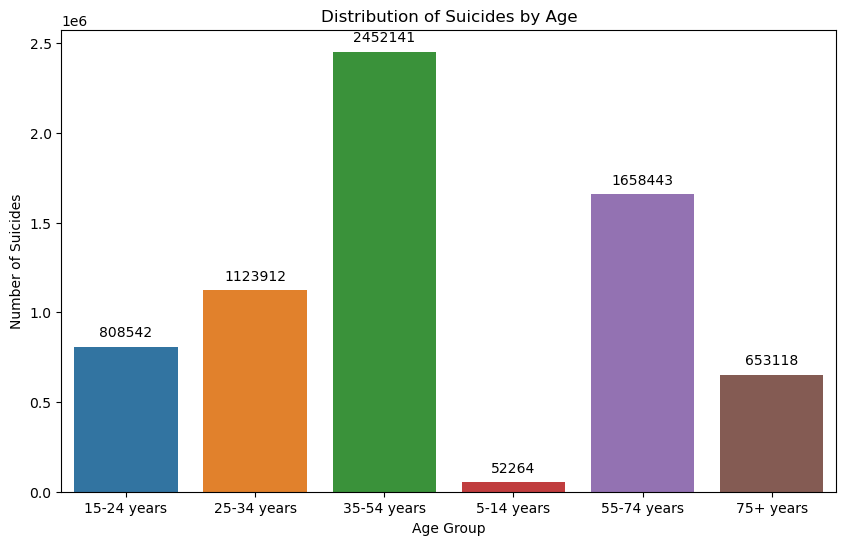

In [25]:
# Group by age and sum the number of suicides
suicides_by_age = df.groupby('age')['suicides_no'].sum().compute().reset_index()

# Increase the figure size
plt.figure(figsize=(10, 6))

# Create a bar graph using seaborn
ax = sns.barplot(x='age', y='suicides_no', data=suicides_by_age)

# Display the number of suicides on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Set plot labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Suicides')
plt.title('Distribution of Suicides by Age')

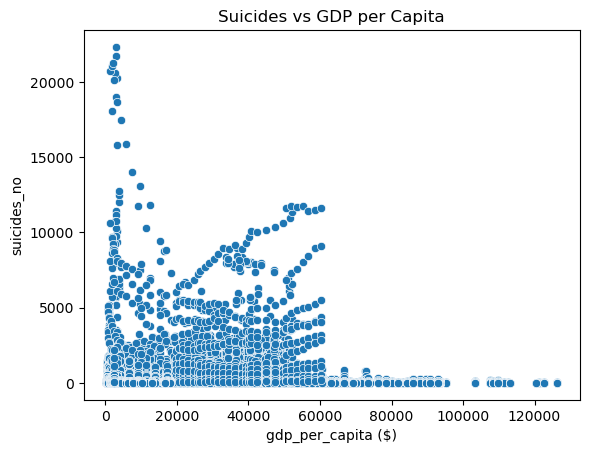

In [26]:
# Scatter plot of suicides vs GDP per capita
sns.scatterplot(x='gdp_per_capita ($)', y='suicides_no', data=df.compute())
plt.title('Suicides vs GDP per Capita')
plt.show()

# Machine Learning - Prediction:

In [27]:
# Select features and target variable
X = df[['population', 'gdp_per_capita ($)']]
y = df['suicides_no']

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [29]:
# Standardize features using Dask-ML's StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Convert Dask DataFrames to Dask Arrays
X_train = X_train.to_dask_array(lengths=True)
X_test = X_test.to_dask_array(lengths=True)
y_train = y_train.to_dask_array(lengths=True)
y_test = y_test.to_dask_array(lengths=True)

In [31]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

In [32]:
r2 = r2_score(y_test, predictions)
print(f"R-squared (R2) Score: {r2}")

R-squared (R2) Score: 0.3136252847664255


In [33]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 627342.1720356717


In [34]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 224.62578384458158


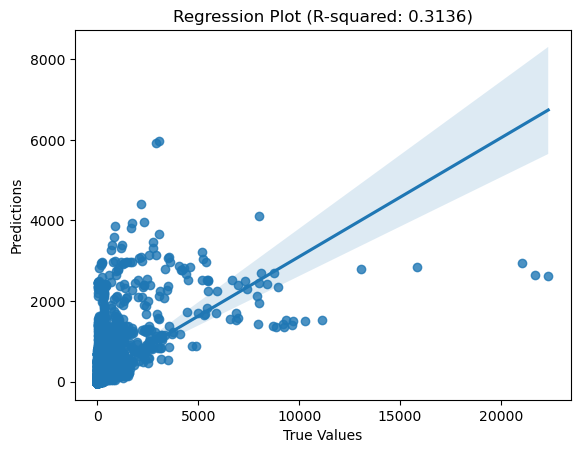

In [37]:
# Calculate R-squared score
r2 = r2_score(y_test, predictions)

# Create a DataFrame for visualization
results_df = pd.DataFrame({'True Values': y_test_np, 'Predictions': predictions_np})

# Plot the regression plot
sns.regplot(x='True Values', y='Predictions', data=results_df)
plt.title(f'Regression Plot (R-squared: {r2:.4f})')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()